<h2> <span style="color: Red;"> Amr Rashad | Social Network Analysis Project | PTBR Twitch dataset </span> </h2>

## <span style="color: LightBlue;"> 0. Outline </span>

1. Loading the dataset and creating the Twitch network graph
2. Perform network analysis
    - Degree Analysis
    - Network Density
    - Average shortest path
    - ECDF & ECCDF
    - Determining the network's hubs
    - Calculating the transitivity
    - Calculating the clustering coefficient
    - Calculating the centrality of each node in the entire network
3. Perform community detection
    - Calculating the modularity using the greedy approach
    - Calculating the modularity using the Louvain approach
    - Evaluating the communities
    - Determining the distribution size of the communities
    - Calculating the centrality of each node in its own community

## <span style="color: IndianRed;"> 1. Loading The Dataset & Exploratory Data Analysis </span>

### <span style="color: LightSalmon;"> *1.1 Load Required Libraries:* </span>

In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import networkx.algorithms.community as nx_comm
from infomap import Infomap
from collections import defaultdict
from operator import itemgetter
from networkx.algorithms import community

### <span style="color: LightSalmon;"> *1.2 Loading The Dataset & Creating Our Graph:* </span>

In [18]:
Twitch_nodes = pd.read_csv('PTBR_target.csv')
Twitch_nodes.head()

,ID,Days,Mature,Views,Partner,New_ID
0,44891403,1943,False,929459,True,1706
1,61180621,1633,False,11194,False,1273
2,145109685,632,False,2850,False,313
3,122121521,906,True,3422,False,1570
4,189445819,267,False,71,False,800


In [19]:
Twitch_edges = pd.read_csv('PTBR_edges.csv')
Twitch_edges.head()

,from,to
0,0,92
1,0,428
2,1,689
3,1,1147
4,1,1666


In [20]:
Twitch_nodes.dtypes

ID         int64
Days       int64
Mature      bool
Views      int64
Partner     bool
New_ID     int64
dtype: object

In [21]:
#Let's change the categorical variables into numerical ones
Twitch_nodes['Mature'] = np.multiply(Twitch_nodes['Mature'], 1)
Twitch_nodes['Partner'] = np.multiply(Twitch_nodes['Partner'], 1)
Twitch_nodes.head()

,ID,Days,Mature,Views,Partner,New_ID
0,44891403,1943,0,929459,1,1706
1,61180621,1633,0,11194,0,1273
2,145109685,632,0,2850,0,313
3,122121521,906,1,3422,0,1570
4,189445819,267,0,71,0,800


In [22]:
# Creating an empty graph
Twitch_graph=nx.Graph()

In [23]:
#Adding nodes & edges
Twitch_graph.add_nodes_from(Twitch_nodes['New_ID'])
Twitch_graph.add_edges_from(zip(Twitch_edges['from'], Twitch_edges['to']))

In [24]:
#Setting node attributes
nx.set_node_attributes(Twitch_graph, Twitch_nodes['Days'], 'Days')
nx.set_node_attributes(Twitch_graph, Twitch_nodes['Mature'], 'Mature')
nx.set_node_attributes(Twitch_graph, Twitch_nodes['Views'], 'Views')
nx.set_node_attributes(Twitch_graph, Twitch_nodes['Partner'], 'Partner')

In [25]:
print(Twitch_graph)

Graph with 1912 nodes and 31299 edges


In [26]:
# list_nodes=list(Twitch_graph.nodes)
# list_edges=list(Twitch_graph.edges)

## <span style="color: IndianRed;"> 2. Network Analysis </span>

### <span style="color: LightSalmon;"> *2.1 Degree Analysis:* </span>

In [27]:
#Applying the degree method to understand how many degrees we have for each node
degree = Twitch_graph.degree
Twitch_graph_degree_dict = dict(Twitch_graph.degree)
Twitch_graph_degree_list = list(dict(Twitch_graph.degree()).values())
print(np.mean(Twitch_graph_degree_list))
print(np.median(Twitch_graph_degree_list))
print(np.std(Twitch_graph_degree_list))
print(np.max(Twitch_graph_degree_list))
print(np.min(Twitch_graph_degree_list))

32.73953974895397
17.0
55.83779131287611
767
1


In [28]:
Twitch_degree_view=Twitch_graph.degree()
print(type(Twitch_degree_view))
print(Twitch_degree_view)
Twitch_degree=list(dict(Twitch_graph.degree()).values())
print('\n',type(Twitch_degree))
print(Twitch_degree)

### <span style="color: LightSalmon;"> *2.2 Network Density:* </span>

In [29]:
density = nx.density(Twitch_graph)
print('Network Density: ', density)

Network Density:  0.017132150575067492


### <span style="color: LightSalmon;"> *2.3 Average Shortest Path:* </span>

In [30]:
average_shortest_path = nx.average_shortest_path_length(Twitch_graph)

In [31]:
print('Average shortest path: ', average_shortest_path)

Average shortest path:  2.5323791570055767


### <span style="color: LightSalmon;"> *2.4 ECDF & ECCDF:* </span>

- Because we have a large network, it's best to use the loglog scale

Text(0, 0.5, 'ECCDF')

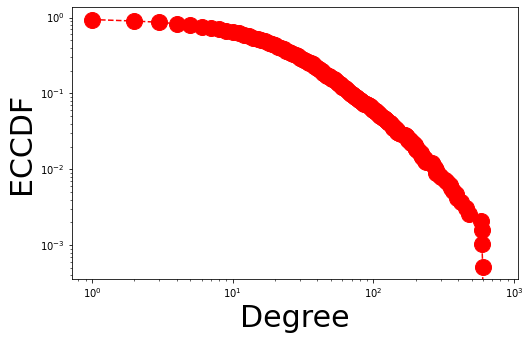

In [32]:
cdf_function = ECDF(Twitch_degree)
x = np.unique(Twitch_degree)
# ECCDF in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECCDF',size = 30)


### <span style="color: LightSalmon;"> *2.5 Determining The Hubs:* </span>

- To determine the hubs of the network, we will be using the ECCDF in loglog scale

In [33]:
percentile_95 = np.percentile(Twitch_degree,95)
print(percentile_95)

113.89999999999964


- Identifying the list of hubs in our Twitch network

In [34]:
hub_nodi = [k for k,v in dict(Twitch_graph.degree()).items() if v>= percentile_95]
print(hub_nodi)

[1311, 777, 557, 669, 467, 1787, 1245, 1414, 577, 471, 496, 1337, 784, 488, 880, 1374, 1739, 1829, 868, 305, 67, 1376, 1036, 1232, 928, 806, 1297, 682, 103, 656, 814, 1555, 1476, 1867, 341, 1486, 698, 1721, 1593, 1196, 751, 1543, 1142, 188, 1179, 369, 717, 1320, 59, 267, 1137, 1422, 1259, 315, 287, 869, 35, 1249, 560, 441, 1557, 404, 127, 982, 275, 1660, 1673, 1287, 1068, 628, 781, 290, 1621, 1433, 1821, 195, 894, 1758, 1763, 654, 1086, 530, 318, 1631, 428, 455, 1502, 36, 147, 1014, 45, 1147, 689, 176, 769, 504]


### <span style="color: LightSalmon;"> *2.6 Triangles & Transitivity:* </span>

In [35]:
print('Twitch graph - dictionary keyed by nodes: number of triangles {}'.format(nx.triangles(Twitch_graph)))

In [36]:
print('Twitch graph - list of the number of triangles of all nodes: {}'.format(list(nx.triangles(Twitch_graph).values())))

In [37]:
print('Twitch graph - transitivity: {}'.format(nx.transitivity(Twitch_graph)))

Twitch graph - transitivity: 0.1309809619261169


### <span style="color: LightSalmon;"> *2.7 Clustering Coefficient:* </span>

In [38]:
print('Twitch graph - local clustering: {}'.format(nx.clustering(Twitch_graph)))

Twitch graph - local clustering: {1706: 0.10418548629930743, 1273: 0.32142857142857145, 313: 0.6083333333333333, 1570: 0.2857142857142857, 800: 0, 1869: 0.30303030303030304, 722: 0, 367: 0.4980237154150198, 150: 0.24272700558330884, 474: 0, 856: 0.16483516483516483, 1144: 0.40476190476190477, 810: 0.28205128205128205, 1569: 0.225, 939: 0.5313131313131313, 1466: 0.41846153846153844, 1311: 0.043143623781951704, 1589: 0.24621212121212122, 434: 0.6666666666666666, 788: 0, 278: 0.3868092691622103, 791: 1.0, 777: 0.1599492461561427, 1367: 0.15379746835443037, 580: 0.301994301994302, 1322: 0.15172413793103448, 237: 0.6386913229018493, 1461: 0.42857142857142855, 638: 0.2857142857142857, 764: 0.2632135306553911, 1148: 0.23557692307692307, 113: 0.2938689217758985, 1535: 0.27832512315270935, 1602: 0.4696969696969697, 134: 0.35454545454545455, 426: 0.13956507627393702, 584: 0.43137254901960786, 1057: 0.1, 324: 0.4334677419354839, 572: 0.47619047619047616, 1348: 0.3246753246753247, 489: 0.311038961

In [39]:
#Average Local Clustering:
nx.average_clustering(Twitch_graph), np.mean(list(nx.clustering(Twitch_graph).values()))

(0.3198952746693517, 0.31989527466935147)

In [40]:
np.median(list(nx.triangles(Twitch_graph).values()))

47.0

### <span style="color: LightSalmon;"> *2.8 Centrality:* </span>

In [41]:
sorted_degree = sorted(Twitch_graph_degree_dict.items(), key = itemgetter(1), reverse= True)
print('Top 10 nodes by degree:')
for i in sorted_degree[:10]:
    print(i)

Top 10 nodes by degree:
(127, 767)
(1476, 598)
(290, 590)
(1297, 587)
(467, 582)
(1660, 475)
(67, 454)
(1320, 416)
(1758, 394)
(1259, 385)


In [42]:
betweeness_dict = nx.betweenness_centrality(Twitch_graph)
#Adding the values of the centralities as attributes in the network's nodes
nx.set_node_attributes(Twitch_graph, betweeness_dict, 'betweeness')


In [43]:
eigenvector_dict = nx.eigenvector_centrality(Twitch_graph)
nx.set_node_attributes(Twitch_graph, eigenvector_dict, 'eigenvector')

In [44]:
sorted_betweeness = sorted(betweeness_dict.items(), key= itemgetter(1), reverse= True)
print('Top 10 nodes by betweeness centrality: ')
for i in sorted_betweeness[:10]:
    print(i)

Top 10 nodes by betweeness centrality: 
(127, 0.09926136702546555)
(1476, 0.05489487265841772)
(1297, 0.05042095543765289)
(290, 0.05011201385679396)
(467, 0.0438247362280139)
(67, 0.034425706705748134)
(1660, 0.026246640254735824)
(1259, 0.02329466551672273)
(287, 0.02212076424483572)
(428, 0.021980008718637745)


## <span style="color: IndianRed;"> 3. Community Detection </span>

### <span style="color: LightSalmon;"> *3.1 Modularity Maximization - Greedy Algorithm:* </span>

In [45]:
list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(Twitch_graph))
print(list_community_sets_greedy)

In [46]:
partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    print('Community:', i)
    print(i, comm) #printing the list of nodes that belong to each community
    for n in comm:
        partition_greedy[n] = i

Community: 0
0 frozenset({2, 3, 5, 12, 14, 18, 19, 23, 26, 31, 38, 40, 41, 45, 50, 51, 53, 54, 56, 58, 62, 64, 65, 66, 69, 71, 73, 74, 75, 76, 77, 79, 81, 83, 84, 86, 90, 91, 97, 98, 103, 104, 105, 107, 109, 111, 113, 115, 117, 120, 124, 126, 127, 129, 130, 132, 134, 136, 137, 138, 141, 142, 143, 152, 153, 154, 159, 160, 161, 162, 163, 166, 169, 170, 172, 174, 175, 178, 179, 182, 183, 184, 185, 187, 191, 192, 193, 194, 200, 201, 202, 206, 207, 211, 213, 215, 216, 217, 218, 221, 222, 223, 226, 228, 229, 230, 234, 235, 236, 238, 239, 241, 242, 243, 246, 247, 248, 249, 250, 252, 254, 257, 262, 263, 268, 269, 270, 271, 272, 273, 274, 275, 277, 278, 281, 282, 283, 284, 288, 289, 290, 292, 293, 294, 295, 296, 297, 298, 305, 306, 310, 311, 313, 316, 317, 318, 319, 322, 323, 324, 325, 327, 331, 335, 338, 342, 343, 345, 351, 354, 356, 365, 367, 371, 373, 375, 376, 381, 385, 387, 388, 390, 395, 396, 398, 399, 400, 401, 402, 403, 406, 407, 410, 412, 413, 417, 421, 423, 425, 426, 428, 433, 434, 43

In [47]:
nx.set_node_attributes(Twitch_graph, partition_greedy, 'Twitch_comm_greedy')

### <span style="color: LightSalmon;"> *3.2 Modularity Maximization - Louvain Algorithm:* </span>

In [48]:
partition_library = community_louvain.best_partition(Twitch_graph)
print(partition_library)

{1706: 0, 1273: 0, 313: 3, 1570: 4, 800: 3, 1869: 1, 722: 0, 367: 3, 150: 0, 474: 5, 856: 4, 1144: 1, 810: 3, 1569: 0, 939: 4, 1466: 1, 1311: 5, 1589: 0, 434: 3, 788: 1, 278: 3, 791: 4, 777: 0, 1367: 0, 580: 4, 1322: 0, 237: 4, 1461: 3, 638: 0, 764: 3, 1148: 0, 113: 5, 1535: 5, 1602: 5, 134: 1, 426: 5, 584: 0, 1057: 5, 324: 3, 572: 1, 1348: 1, 489: 0, 214: 3, 463: 0, 871: 0, 1236: 0, 1166: 0, 1852: 5, 963: 0, 382: 0, 1682: 3, 387: 3, 1225: 4, 1730: 1, 557: 5, 307: 4, 149: 0, 1582: 5, 1312: 0, 571: 1, 1230: 0, 1296: 0, 761: 0, 835: 5, 527: 0, 885: 4, 1193: 1, 1121: 0, 1304: 3, 1211: 3, 1385: 3, 1154: 0, 502: 5, 770: 5, 669: 0, 327: 3, 1552: 0, 854: 3, 624: 5, 1104: 0, 1727: 5, 153: 5, 1886: 0, 931: 5, 1208: 4, 1342: 1, 675: 1, 467: 3, 1340: 0, 114: 4, 536: 3, 1692: 3, 1308: 0, 671: 5, 1618: 1, 1145: 5, 96: 4, 295: 0, 405: 5, 1477: 3, 1503: 4, 1787: 3, 215: 1, 1285: 5, 1626: 4, 1279: 0, 1117: 4, 832: 1, 942: 5, 352: 0, 1245: 3, 83: 3, 1231: 1, 1800: 0, 1515: 1, 1896: 3, 1743: 1, 79: 5, 1

In [49]:
nx.set_node_attributes(Twitch_graph, partition_library, 'community_library')

### <span style="color: LightSalmon;"> *3.3 Evaluating The Communities:* </span>

In [50]:
Twitch_communities = set(partition_library.values())
Twitch_communities

{0, 1, 2, 3, 4, 5, 6, 7}

In [51]:
list_community_sets_louvain = [set() for i in range(len(Twitch_communities))]

In [52]:
for n, Twitch_communities in partition_library.items():
    list_community_sets_louvain[Twitch_communities].add(n)

list_community_sets_louvain

[{1,
  6,
  8,
  9,
  11,
  16,
  21,
  24,
  25,
  27,
  29,
  30,
  33,
  34,
  35,
  36,
  42,
  46,
  52,
  55,
  57,
  59,
  60,
  61,
  67,
  68,
  70,
  78,
  80,
  82,
  89,
  95,
  101,
  102,
  106,
  110,
  116,
  123,
  131,
  135,
  139,
  140,
  145,
  147,
  148,
  149,
  150,
  165,
  168,
  173,
  176,
  180,
  188,
  189,
  190,
  195,
  198,
  205,
  210,
  220,
  225,
  227,
  233,
  244,
  245,
  259,
  260,
  264,
  266,
  267,
  285,
  286,
  287,
  291,
  295,
  302,
  308,
  312,
  314,
  315,
  320,
  321,
  326,
  328,
  329,
  330,
  332,
  333,
  336,
  337,
  340,
  346,
  347,
  349,
  352,
  353,
  357,
  369,
  379,
  382,
  384,
  389,
  391,
  398,
  404,
  408,
  411,
  415,
  418,
  422,
  424,
  429,
  437,
  438,
  439,
  440,
  443,
  450,
  454,
  457,
  462,
  463,
  472,
  477,
  483,
  489,
  493,
  495,
  505,
  506,
  507,
  509,
  512,
  513,
  517,
  523,
  524,
  527,
  528,
  530,
  533,
  539,
  540,
  543,
  548,
  549,
  552,
  555,


In [53]:
for my_list in [list_community_sets_greedy, list_community_sets_louvain]:
    #Coverage
    print('Coverage: ', nx_comm.coverage(Twitch_graph, my_list))
    #Modularity
    print('Modularity: ', nx_comm.modularity(Twitch_graph, my_list, weight= 'weight'))
    #Performance
    print('Performance: ', nx_comm.performance(Twitch_graph, my_list))

    print('---')

Coverage:  0.6812038723281894
Modularity:  0.26367204075378853
Performance:  0.6488711029954306
---
Coverage:  0.537109811815074
Modularity:  0.29174015111077933
Performance:  0.7913012968302867
---


### <span style="color: LightSalmon;"> *3.4 Distribution Size Of The Communities:* </span>

In [54]:
pairs = []
for i, nodes in enumerate(list_community_sets_louvain):
    print(i, len(nodes))
    comm_size = (i, len(nodes))
    pairs.append(comm_size)

0 526
1 343
2 3
3 426
4 208
5 387
6 16
7 3


In [55]:
community_index = []
number_of_nodes = []

for Twitch_communities, n_nodes in pairs:
    community_index.append(str(Twitch_communities))
    number_of_nodes.append(n_nodes)

Text(0, 0.5, 'Number of Nodes')

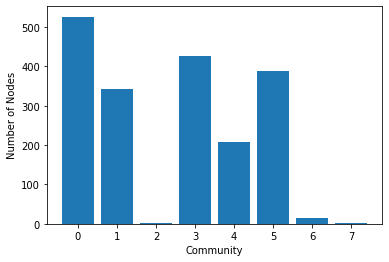

In [56]:
plt.bar(community_index, number_of_nodes)
plt.xlabel('Community')
plt.ylabel('Number of Nodes')

### <span style="color: LightSalmon;"> *3.5 Centrality in Communities:* </span>

In [57]:
centr_comm = {}
for comm in list_community_sets_louvain:
    subgraph = Twitch_graph.subgraph(comm)
    print(subgraph.order())
    print(nx.degree_centrality(subgraph))
    print('---')

526
{1: 0.0038095238095238095, 6: 0.06476190476190476, 8: 0.007619047619047619, 9: 0.026666666666666665, 11: 0.06666666666666667, 16: 0.03428571428571429, 21: 0.0380952380952381, 24: 0.03238095238095238, 25: 0.011428571428571429, 27: 0.0380952380952381, 29: 0.08190476190476191, 30: 0.01904761904761905, 33: 0.09904761904761905, 34: 0.0038095238095238095, 35: 0.20761904761904762, 36: 0.21523809523809523, 42: 0.005714285714285714, 46: 0.017142857142857144, 52: 0.03428571428571429, 55: 0.03238095238095238, 57: 0.05523809523809524, 59: 0.17333333333333334, 60: 0.024761904761904763, 61: 0.0838095238095238, 67: 0.4419047619047619, 68: 0.022857142857142857, 70: 0.06285714285714286, 78: 0.05714285714285714, 80: 0.017142857142857144, 82: 0.024761904761904763, 89: 0.011428571428571429, 95: 0.10095238095238095, 101: 0.09142857142857143, 102: 0.10857142857142857, 106: 0.08952380952380952, 110: 0.05904761904761905, 116: 0.12571428571428572, 123: 0.007619047619047619, 131: 0.049523809523809526, 135: 

In [58]:
centr_comm = {}
for comm in list_community_sets_louvain:
    subgraph = Twitch_graph.subgraph(comm)
    node_degrees = nx.degree_centrality(subgraph)
    for n, d in node_degrees.items():
        centr_comm[n] = d

In [59]:
#printing the degree centrality of each node in its community
centr_comm

{1: 0.0038095238095238095,
 6: 0.06476190476190476,
 8: 0.007619047619047619,
 9: 0.026666666666666665,
 11: 0.06666666666666667,
 16: 0.03428571428571429,
 21: 0.0380952380952381,
 24: 0.03238095238095238,
 25: 0.011428571428571429,
 27: 0.0380952380952381,
 29: 0.08190476190476191,
 30: 0.01904761904761905,
 33: 0.09904761904761905,
 34: 0.0038095238095238095,
 35: 0.20761904761904762,
 36: 0.21523809523809523,
 42: 0.005714285714285714,
 46: 0.017142857142857144,
 52: 0.03428571428571429,
 55: 0.03238095238095238,
 57: 0.05523809523809524,
 59: 0.17333333333333334,
 60: 0.024761904761904763,
 61: 0.0838095238095238,
 67: 0.4419047619047619,
 68: 0.022857142857142857,
 70: 0.06285714285714286,
 78: 0.05714285714285714,
 80: 0.017142857142857144,
 82: 0.024761904761904763,
 89: 0.011428571428571429,
 95: 0.10095238095238095,
 101: 0.09142857142857143,
 102: 0.10857142857142857,
 106: 0.08952380952380952,
 110: 0.05904761904761905,
 116: 0.12571428571428572,
 123: 0.007619047619047619,

In [60]:
nx.set_node_attributes(Twitch_graph, centr_comm, 'centr_comm')

In [61]:
sorted_centr_comm = sorted(centr_comm.items(), key= itemgetter(1), reverse= True)
print('Top 10 nodes by betweeness centrality: ')
for i in sorted_centr_comm[:10]:
    print(i)

Top 10 nodes by betweeness centrality: 
(1890, 1.0)
(1404, 1.0)
(119, 0.7333333333333333)
(127, 0.7058823529411764)
(290, 0.6549707602339181)
(467, 0.5929411764705882)
(1320, 0.567251461988304)
(1660, 0.5584795321637427)
(1476, 0.5467836257309941)
(1297, 0.5223529411764706)


## <span style="color: IndianRed;"> 4. Creating A Gephi File For Network Visualization </span>

In [62]:
nx.write_gexf(G = Twitch_graph, path = 'PTBR.gexf')